In [1]:
import numpy as np 
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2,3)] # petal length, petal width
y = (iris['target']==2).astype(np.float64) # Iris virginica

/Users/joelvenzke/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')),
])
svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [5]:
svm_clf.predict([[5.5,1.7]])

array([1.])

In [28]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples=1000, noise=0.15)
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=10, loss='hinge',max_iter=10000)),
])
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=10, loss='hinge', max_iter=10000))])

In [18]:
y_pred = polynomial_svm_clf.predict(X)
n_correct = sum(y_pred == y)
print(n_correct / len(y_pred))

1.0


In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(polynomial_svm_clf, X, y, cv=3, scoring='accuracy')

array([1., 1., 1.])

[ True  True  True  True False False False False False False  True  True
  True  True  True  True False  True False False False  True  True  True
  True False  True False False False False False  True  True False False
 False False  True  True  True  True  True False  True False False  True
 False False False False  True  True False False  True False False False
 False False  True False False  True  True False False  True  True False
  True  True False  True False  True False  True False False False  True
  True  True False False  True False False  True  True False  True  True
 False False False  True  True False  True False False False False False
  True False  True  True False  True False False False False  True  True
 False False False False  True False  True  True False False  True  True
 False  True False  True  True  True  True False  True  True False  True
 False False False False False  True False False  True False  True False
  True False  True  True  True  True  True  True Fa

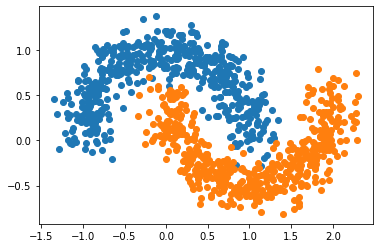

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

index = (y==0)
plt.scatter(X[index,0], X[index,1])
index = (y==1)
plt.scatter(X[index,0], X[index,1])
plt.show()

In [31]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()), 
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
cross_val_score(poly_kernel_svm_clf, X, y, cv=3, scoring='accuracy')

array([0.97305389, 0.99099099, 0.99099099])

In [26]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [32]:
cross_val_score(rbf_kernel_svm_clf, X, y, cv=3, scoring='accuracy')

array([0.98203593, 0.4984985 , 0.4984985 ])